# HMI input

In [1]:
from setproctitle import setproctitle

setproctitle("HMI")

In [2]:
import os
import glob
import numpy as np
from sunpy.map import Map
import matplotlib.pyplot as plt
from astropy import units as u

In [3]:
path = 'NOAA11429_20120307_110000'

In [4]:
input_path = f'01_input/{path}'

In [6]:
hmi_p = glob.glob(os.path.join(input_path, 'hmi/*Bp.fits'))[0]
hmi_t = glob.glob(os.path.join(input_path, 'hmi/*Bt.fits'))[0]
hmi_r = glob.glob(os.path.join(input_path, 'hmi/*Br.fits'))[0]

In [7]:
p_map, t_map, r_map = Map(hmi_p), Map(hmi_t), Map(hmi_r)

See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]


See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]


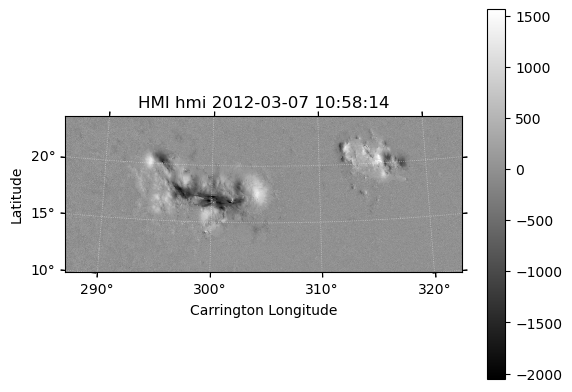

See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]


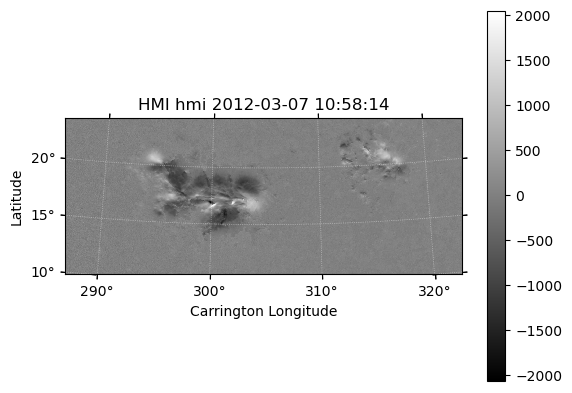

See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]


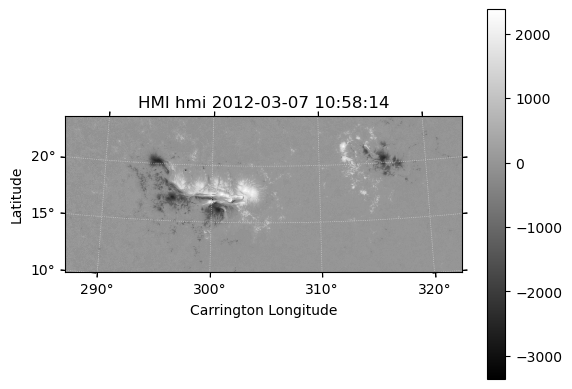

(None, None, None)

In [8]:
p_map.peek(), t_map.peek(), r_map.peek()

In [9]:
maps = [p_map, t_map, r_map]
B_hmi = np.stack([maps[0].data, -maps[1].data, maps[2].data]).transpose()
B_hmi.shape

(1167, 460, 3)

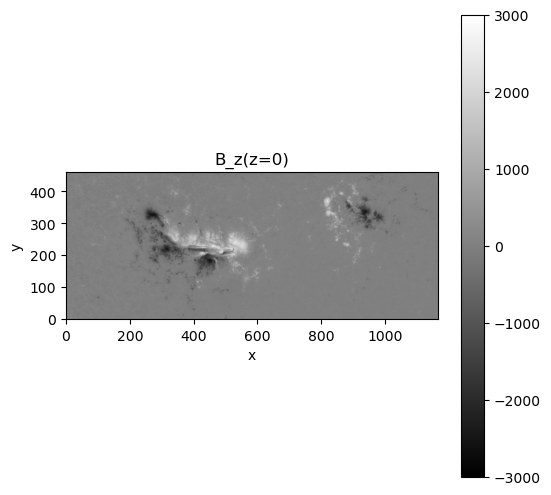

In [10]:
plt.close()
fig, ax = plt.subplots(figsize=(6,6))
CS = plt.imshow(B_hmi[:, :, 2].transpose(), origin='lower', cmap='gray', vmin=-3000, vmax=3000)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title("B_z(z=0)")
fig.colorbar(CS)
plt.show()

In [11]:
bin = 2
maps_binned = [m.superpixel(u.Quantity((bin, bin), u.pixel), func=np.mean) for m in maps]
B_binned = np.stack([maps_binned[0].data, -maps_binned[1].data, maps_binned[2].data]).transpose()
B_binned.shape

See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]


(583, 230, 3)

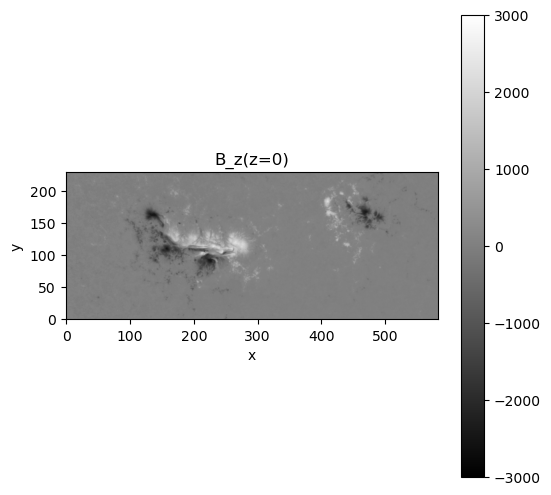

In [12]:
plt.close()
fig, ax = plt.subplots(figsize=(6,6))
CS = plt.imshow(B_binned[:, :, 2].transpose(), origin='lower', cmap='gray', vmin=-3000, vmax=3000)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title("B_z(z=0)")
fig.colorbar(CS)
plt.show()

In [13]:
b_bottom = np.array(B_binned)

In [14]:
bottom_npy_path = os.path.join(input_path, 'b_bottom.npy')

In [15]:
with open(bottom_npy_path, 'wb') as f:
        np.save(f, b_bottom)